<a href="https://colab.research.google.com/github/shreythapar/ML_Dataset/blob/main/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dhruvpathak1/machine_learning/main/mobile_price.csv'
df2 = pd.read_csv(url)
df2.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets
X = df2.iloc[:, [1,7]].values
Y = df2.iloc[:,6].values
x = pd.DataFrame(X)
(X_train, X_test, y_train, y_test) = train_test_split(x, Y, train_size=0.7, random_state=1)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.53

In [ ]:
#Maximum Depth of a Tree- This parameter determines the maximum depth of the tree. 
#A higher value of this variable causes overfitting and a lower value causes underfitting.
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred = clf_gini.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 53.0


In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[146  14]
 [127  13]]


In [ ]:
y_pred = clf_entropy.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 53.0


In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[146  14]
 [127  13]]


In [ ]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)

[0 1]


[Text(354.11538461538464, 475.65000000000003, 'X[0] <= 610.5\nentropy = 1.0\nsamples = 700\nvalue = [353, 347]'),
 Text(128.76923076923077, 339.75, 'X[0] <= 517.5\nentropy = 0.881\nsamples = 50\nvalue = [15, 35]'),
 Text(64.38461538461539, 203.85000000000002, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(193.15384615384616, 203.85000000000002, 'X[0] <= 564.5\nentropy = 0.837\nsamples = 45\nvalue = [12, 33]'),
 Text(128.76923076923077, 67.94999999999999, 'entropy = 0.691\nsamples = 27\nvalue = [5, 22]'),
 Text(257.53846153846155, 67.94999999999999, 'entropy = 0.964\nsamples = 18\nvalue = [7, 11]'),
 Text(579.4615384615385, 339.75, 'X[1] <= 4.5\nentropy = 0.999\nsamples = 650\nvalue = [338, 312]'),
 Text(450.69230769230774, 203.85000000000002, 'X[0] <= 1628.5\nentropy = 0.898\nsamples = 35\nvalue = [11, 24]'),
 Text(386.3076923076923, 67.94999999999999, 'entropy = 0.958\nsamples = 29\nvalue = [11, 18]'),
 Text(515.0769230769231, 67.94999999999999, 'entropy = 0.0\nsamples = 6\nva

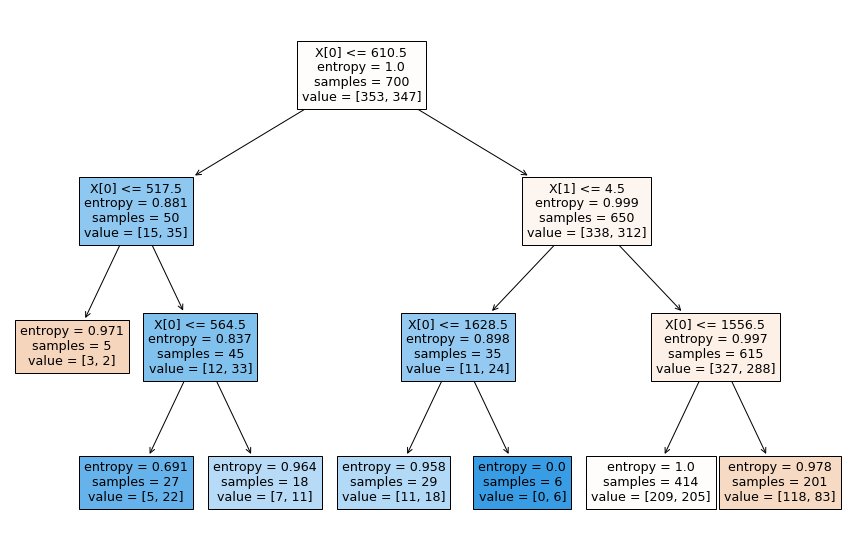

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)

In [ ]:
#ensemble learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.5

In [ ]:
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[85 75]
 [75 65]]


In [ ]:
rf=GradientBoostingClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.53

In [ ]:
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[97 63]
 [78 62]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4866666666666667

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.51

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5266666666666666

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import tree
model = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5233333333333333